## PROYEK SCORECARD MODEL HOME CREDIT INDONESIA
Nama: Steven Hot Asi Sihite

## **IMPORT LIBRARY**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

## **MEMASUKKAN DATA**

In [5]:
application_train = pd.read_csv('application_train.csv')
application_test = pd.read_csv('application_test.csv')

## **EXPLORATORY DATA ANALYSIS (EDA)**


In [6]:
def initial_eda(dataframe):
    print("Informasi Dataset:")
    print(dataframe.info())

    print("\nStatistik Deskriptif:")
    print(dataframe.describe())

    print("\nCek Missing Values:")
    print(dataframe.isnull().sum())

# Melakukan EDA pada application_train
initial_eda(application_train)

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None

Statistik Deskriptif:
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.

## **DATA PRAPROCESSING**


In [19]:
def praproses_data(df):

    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('TARGET', errors='ignore')
    categorical_features = df.select_dtypes(include=['object']).columns

    # Pembersihan data
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median'))
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Gabungan transformasi
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    return preprocessor

# Terapkan praproses
preprocessor = praproses_data(application_train)

## **PERSIAPAN DATA UNTUK PEMODELAN**

In [20]:
X = application_train.drop('TARGET', axis=1)
y = application_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Transformasi data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

## **MODEL MACHINE LEARNING**

In [21]:
# Model 1: Logistic Regression
lr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=5000,
        solver='liblinear',
        class_weight='balanced',
        penalty='l2',
        C=1.0
    ))
])

# Model 2: Random Forest
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight='balanced',
        random_state=42
    ))
])

from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=cv, scoring='roc_auc')

rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='roc_auc')

print("Logistic Regression CV ROC AUC Scores:", lr_cv_scores)
print("Logistic Regression Mean ROC AUC:", lr_cv_scores.mean())
print("\nRandom Forest CV ROC AUC Scores:", rf_cv_scores)
print("Random Forest Mean ROC AUC:", rf_cv_scores.mean())

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

Logistic Regression CV ROC AUC Scores: [0.72863232 0.65879027 0.68684359 0.67958282 0.68263318]
Logistic Regression Mean ROC AUC: 0.687296436103653

Random Forest CV ROC AUC Scores: [0.72399954 0.73037733 0.72936884 0.71982904 0.72847312]
Random Forest Mean ROC AUC: 0.7264095745187868


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19...
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=5,
                                        min_samples_split=10, n_estimators=200,
                                        random_state=42))])

## **MODEL EVALUATION**


Logistic Regression Cross-Validation Results:
CV ROC AUC Scores: [0.72863232 0.65879027 0.68684359 0.67958282 0.68263318]
Mean CV ROC AUC: 0.6873
Standard Deviation: 0.0228


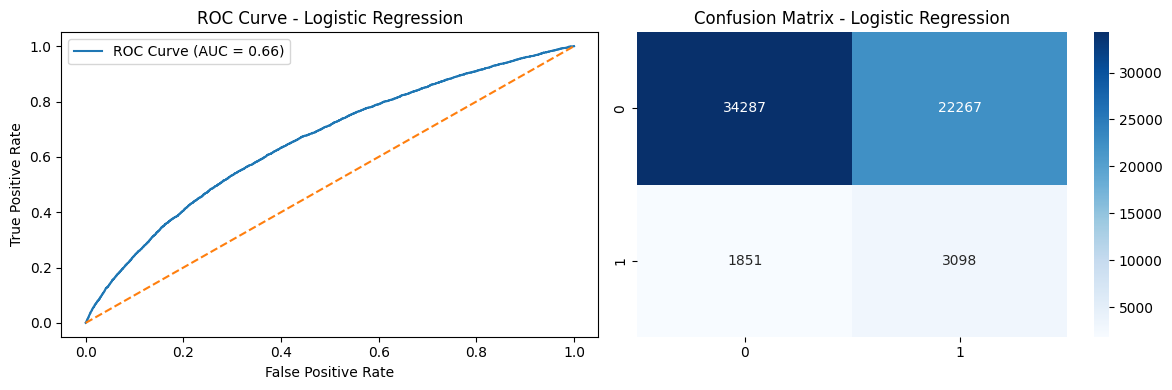


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.61      0.74     56554
           1       0.12      0.63      0.20      4949

    accuracy                           0.61     61503
   macro avg       0.54      0.62      0.47     61503
weighted avg       0.88      0.61      0.70     61503


Random Forest Cross-Validation Results:
CV ROC AUC Scores: [0.72399954 0.73037733 0.72936884 0.71982904 0.72847312]
Mean CV ROC AUC: 0.7264
Standard Deviation: 0.0039


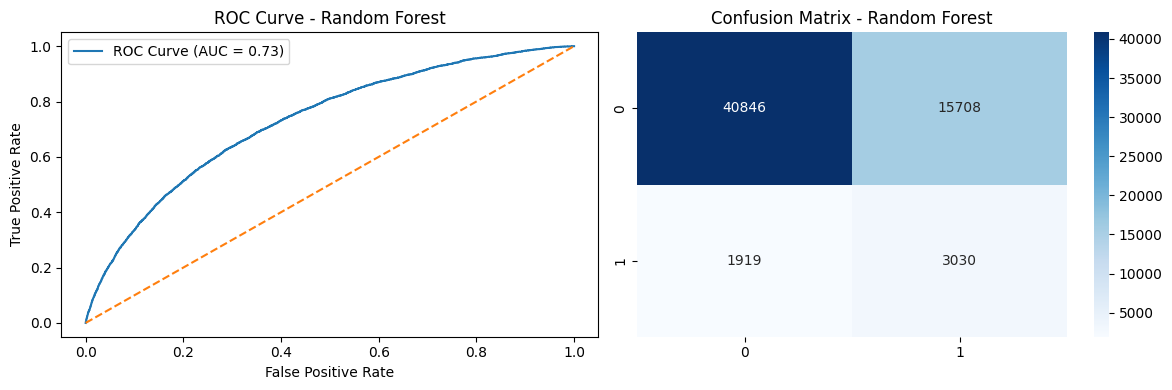


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.72      0.82     56554
           1       0.16      0.61      0.26      4949

    accuracy                           0.71     61503
   macro avg       0.56      0.67      0.54     61503
weighted avg       0.89      0.71      0.78     61503



In [10]:
def model_evaluation(models, X_train, y_train, X_test, y_test):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    model_results = {}

    for name, model in models.items():

        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')

        print(f"\n{name} Cross-Validation Results:")
        print(f"CV ROC AUC Scores: {cv_scores}")
        print(f"Mean CV ROC AUC: {cv_scores.mean():.4f}")
        print(f"Standard Deviation: {cv_scores.std():.4f}")

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        roc_auc = roc_auc_score(y_test, y_pred_proba)
        classification_rep = classification_report(y_test, y_pred)

        model_results[name] = {
            'cv_scores': cv_scores,
            'mean_cv_score': cv_scores.mean(),
            'roc_auc': roc_auc,
            'classification_report': classification_rep
        }

        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.title(f'ROC Curve - {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()

        plt.subplot(1, 2, 2)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')

        plt.tight_layout()
        plt.show()

        print(f"\nClassification Report for {name}:")
        print(classification_rep)

    return model_results

models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model
}

evaluation_results = model_evaluation(models, X_train, y_train, X_test, y_test)

## **FEATURE IMPORTANCE**

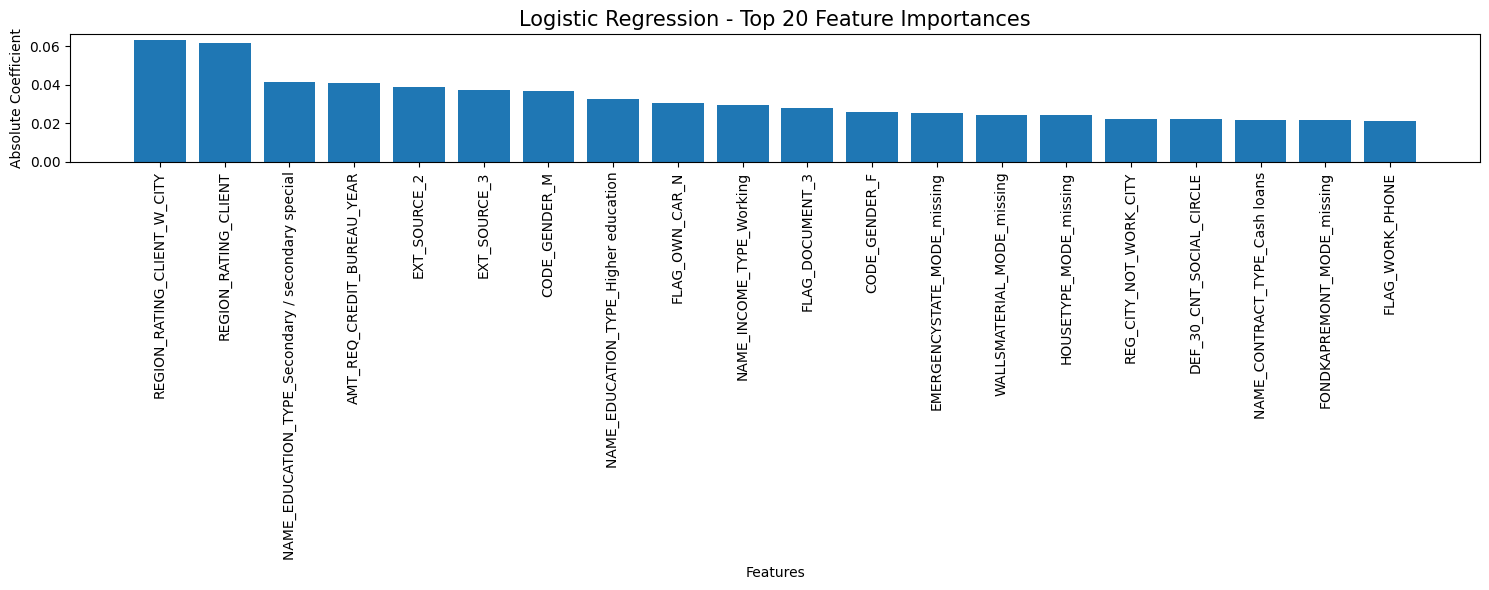


Logistic Regression - Top 20 Features:
REGION_RATING_CLIENT_W_CITY: 0.0629290938420611
REGION_RATING_CLIENT: 0.061392178310387735
NAME_EDUCATION_TYPE_Secondary / secondary special: 0.041514370376752076
AMT_REQ_CREDIT_BUREAU_YEAR: 0.04084039002467222
EXT_SOURCE_2: 0.03872935704471105
EXT_SOURCE_3: 0.0371148625361133
CODE_GENDER_M: 0.03682645059490432
NAME_EDUCATION_TYPE_Higher education: 0.032387211706485425
FLAG_OWN_CAR_N: 0.030690959876550968
NAME_INCOME_TYPE_Working: 0.029518103415895957
FLAG_DOCUMENT_3: 0.028115718817836068
CODE_GENDER_F: 0.025719088810726824
EMERGENCYSTATE_MODE_missing: 0.025269304701754276
WALLSMATERIAL_MODE_missing: 0.02416906976607916
HOUSETYPE_MODE_missing: 0.024117307707222105
REG_CITY_NOT_WORK_CITY: 0.022061340688184345
DEF_30_CNT_SOCIAL_CIRCLE: 0.021911193710649486
NAME_CONTRACT_TYPE_Cash loans: 0.021891706412191066
FONDKAPREMONT_MODE_missing: 0.021770039032361452
FLAG_WORK_PHONE: 0.02124901089562513


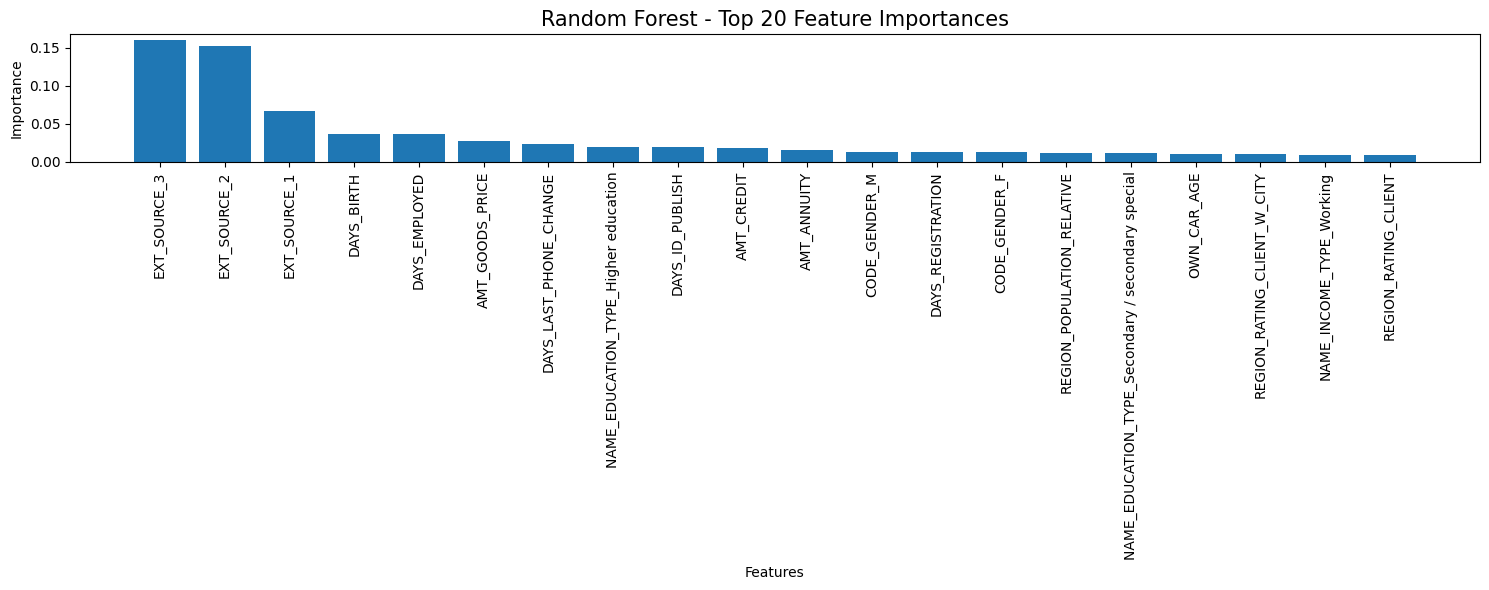


Random Forest - Top 20 Features:
EXT_SOURCE_3: 0.15942182400372343
EXT_SOURCE_2: 0.15227557744527634
EXT_SOURCE_1: 0.06624863388360935
DAYS_BIRTH: 0.037053472717069304
DAYS_EMPLOYED: 0.0358437851469267
AMT_GOODS_PRICE: 0.027349911130352567
DAYS_LAST_PHONE_CHANGE: 0.023121864770339267
NAME_EDUCATION_TYPE_Higher education: 0.01923585799642431
DAYS_ID_PUBLISH: 0.01886505555030136
AMT_CREDIT: 0.01835456795673592
AMT_ANNUITY: 0.01579618310311132
CODE_GENDER_M: 0.012378772562894406
DAYS_REGISTRATION: 0.012278598194823607
CODE_GENDER_F: 0.012194348045975816
REGION_POPULATION_RELATIVE: 0.011511293063841964
NAME_EDUCATION_TYPE_Secondary / secondary special: 0.011275096126445394
OWN_CAR_AGE: 0.010464303165660065
REGION_RATING_CLIENT_W_CITY: 0.009915144783587975
NAME_INCOME_TYPE_Working: 0.009073260083787213
REGION_RATING_CLIENT: 0.008684659360736901


In [11]:
def feature_importance_analysis(models, X_train, preprocessor):
    numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
    categorical_features = X_train.select_dtypes(include=['object']).columns

    onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    feature_names = (
        list(numeric_features) +
        list(onehot_encoder.get_feature_names_out(categorical_features))
    )

    for name, model in models.items():
        plt.figure(figsize=(15, 6))

        if name == 'Random Forest' and hasattr(model.named_steps['classifier'], 'feature_importances_'):
            # Untuk Random Forest
            importances = model.named_steps['classifier'].feature_importances_
            indices = np.argsort(importances)[::-1]

            plt.title(f"{name} - Top 20 Feature Importances", fontsize=15)
            plt.bar(range(20), importances[indices][:20])
            plt.xticks(range(20), [feature_names[i] for i in indices[:20]], rotation=90)
            plt.xlabel("Features")
            plt.ylabel("Importance")
            plt.tight_layout()
            plt.show()

            print(f"\n{name} - Top 20 Features:")
            for i in range(20):
                print(f"{feature_names[indices[i]]}: {importances[indices[i]]}")

        elif name == 'Logistic Regression' and hasattr(model.named_steps['classifier'], 'coef_'):
            # Untuk Logistic Regression
            coefficients = np.abs(model.named_steps['classifier'].coef_[0])
            indices = np.argsort(coefficients)[::-1]

            plt.title(f"{name} - Top 20 Feature Importances", fontsize=15)
            plt.bar(range(20), coefficients[indices][:20])
            plt.xticks(range(20), [feature_names[i] for i in indices[:20]], rotation=90)
            plt.xlabel("Features")
            plt.ylabel("Absolute Coefficient")
            plt.tight_layout()
            plt.show()

            print(f"\n{name} - Top 20 Features:")
            for i in range(20):
                print(f"{feature_names[indices[i]]}: {coefficients[indices[i]]}")

feature_importance_analysis(models, X_train, preprocessor)

In [24]:
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Membuat DataFrame sesuai format sample_submission
submission = pd.DataFrame({
    'SK_ID_CURR': X_test['SK_ID_CURR'],
    'TARGET': y_pred_proba
})

# Simpan ke file CSV
submission.to_csv('submission.csv', index=False)

print("File submission.csv telah dibuat!")

File submission.csv telah dibuat!
